        ts_code trade_date  open  high   low  close  pre_close  change  \
2817  600019.SH 2011-01-04  6.44  6.56  6.31   6.55       6.39    0.16   
2816  600019.SH 2011-01-05  6.49  6.50  6.42   6.45       6.55   -0.10   
2815  600019.SH 2011-01-06  6.46  6.50  6.39   6.46       6.45    0.01   
2814  600019.SH 2011-01-07  6.46  6.68  6.41   6.56       6.46    0.10   
2813  600019.SH 2011-01-10  6.54  6.64  6.51   6.52       6.56   -0.04   
2812  600019.SH 2011-01-11  6.52  6.72  6.51   6.70       6.52    0.18   
2811  600019.SH 2011-01-12  6.72  6.90  6.67   6.83       6.70    0.13   
2810  600019.SH 2011-01-13  6.87  6.90  6.73   6.77       6.83   -0.06   
2809  600019.SH 2011-01-14  6.77  6.77  6.61   6.71       6.77   -0.06   
2808  600019.SH 2011-01-17  6.64  6.74  6.48   6.53       6.71   -0.18   

      pct_chg        vol      amount  
2817     2.50  572249.83  369381.672  
2816    -1.53  334574.19  215978.272  
2815     0.16  248061.88  159829.914  
2814     1.55  562598.63  368

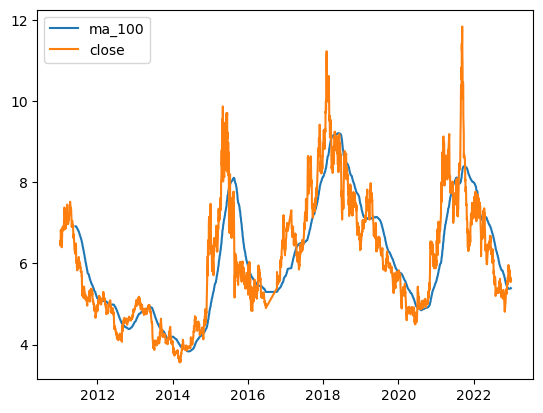

In [3]:
!pip install tushare
!pip install pandas
!pip install numpy
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## set this to your tushare token
ts.set_token('')
pro = ts.pro_api()

data = pro.daily(ts_code='600019.SH', start_date='20110101', end_date='20230101')
## sort the data in trade_date
data.sort_values('trade_date', inplace = True,ascending= True)
## format the trade-date to "year-month-date"
data['trade_date'] = pd.to_datetime(data['trade_date'], format="%Y%m%d")
print(data.head(10))
## calculate the moving average of close
data['ma_100'] = data['close'].rolling(100).mean()
plt.figure()
plt.plot(data['trade_date'],data['ma_100'],label = 'ma_100')
plt.plot(data['trade_date'],data['close'],label = 'close')
plt.legend()
plt.show()